# Exploratory Data Analysis (EDA)
Adapted from https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec

More to explore: https://towardsdatascience.com/semi-automated-exploratory-data-analysis-eda-in-python-7f96042c9809

**Outline**
* [Required python libraries](#Required-python-libraries)
* [Dataset overall characteristics](#Dataset-and-its-overall-characteristics)
* [Univariate Analysis](#Univariate-Analysis---One-variable-analysis)
 * [Bar plot](#Bar-plot)
 * [Histogram and Boxplot](#Histogram-and-Boxplot)
* [Multivariate Analysis](#Multivariate-Analysis----the-simultaneous-analysis-of-more-than-one-outcome-variable)
 * [Categorical vs numerical](#Categorical-vs-numerical)
   * [Density plot](#Density-plot)
   * [Bins plot](#Bins-plot)
   * [Box plot for two variables](#Boxplot-for-two-variables)
   * [Pair plot](#Pair-plot)
   * [One-way ANOVA](#One-way-ANOVA)
 * [Categorical vs categorical](#Categorical-vs-Categorical)
   * [Count plot](#Count-plot)
   * [Plot showing percentages](#Plot-showing-percentages-(Barplot-with-percentages))
   * [Heatmap](#Heatmap)
   * [Chi-Square test and Cramer’s V](#Chi-Square-test-and-Cramer%E2%80%99s-V)
 * [Numerical vs numerical](#Numerical-vs-numerical)
   * [Scatter plot](#Scatter-plot)
* [Correlation Analysis](#Correlation-Analysis)
* [Exercise](#Exercise)

## Required python libraries

In [ ]:
# Install necessary python libraries
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install statsmodels

In [2]:
# Load necessary python libraries
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for encoding 
import sklearn.preprocessing as preproc

## Dataset and its overall characteristics 
**Titanic dataset from Kaggle:**

For the details see: https://www.kaggle.com/competitions/titanic/data

In [3]:
url = 'https://raw.githubusercontent.com/ZIFODS/Training/master/data/data_titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**EDA task "Dataset overview"**: how many categorical and numerical variables there are and the proportion of missing data.

In [ ]:
df.info()

In [ ]:
# Function excludes the character columns and given summary about numeric columns.
df.describe()

In [ ]:
df.describe(include='all')

In [ ]:
# To show number of nulls (Not available data points or NAs) in the dataset
missing = df.isnull().sum()
missing

In [ ]:
# Code from https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param df: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [ ]:
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

There are 891 rows and 12 columns:

* each row of the table represents a specific passenger (or observation) identified by PassengerId, 
* Survived is the phenomenon that we want to understand and predict (or target variable), It contains two classes: 1 if the passenger survived and 0 otherwise, therefore this use case is **a binary classification problem**.
* Age and Fare are numerical variables while the others are categorical.
* Only Age and Cabin contain missing data.

In [ ]:
# Column PassengerId is a unique passenger identificator and can be used as an index.
df = df.set_index("PassengerId")

## Univariate Analysis - One variable analysis
### Bar plot
A bar plot is appropriate to understand labels frequency for a single categorical variable.

In [ ]:
graph = plt.bar(["No - 0","Yes - 1"],df["Survived"].value_counts())
plt.title("Survived")
plt.grid(axis="y")

# Add percentages to the bars
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(df["Survived"].value_counts(normalize=True).mul(100)[i],2))+'%',
             ha='center')
    i+=1
    
plt.show()

In [ ]:
# Simiar barplot (called countplot) by using seaborn library:
ax = sns.countplot(x="Survived", data=df)

# Add percentage
total = sum(df["Survived"].value_counts())
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

342 passengers survived and 549 didn’t, in other words the survival rate (or the population mean) is 38%.

In [ ]:
df["Survived"].value_counts()

### Histogram and Boxplot
A histogram is perfect to give a rough sense of the density of the underlying distribution of a single numerical data.
A boxplot is used to show locality, spread and skewness groups of numerical data.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle("Age", fontsize=20)

### Histogram
ax[0].title.set_text('Histogram')
# Fill missing values with average age
variable = df["Age"].fillna(df["Age"].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
# analagous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.
sns.histplot(variable, kde=True, ax=ax[0])
des = df["Age"].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### Boxplot to show outliers
ax[1].title.set_text('Boxplot (log scale)')
tmp_df = pd.DataFrame(df["Age"])
tmp_df["Age"] = np.log(tmp_df["Age"])
tmp_df.boxplot(column="Age", ax=ax[1])
plt.show()

The passengers were, on average, pretty young: the distribution is skewed towards the left side (the mean is 29.7 years old and the 75th percentile is 38 years old). Coupled with the outliers in the box plot, the first spike in the left tail says that there was a significant amount of children.

In [5]:
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df['Age'], bins=[0,1,4,16,30,60,100], labels=["baby","toddler","child","young","middle_aged","old"])
    return df

# Call function
df = get_num_people_by_age_category(df)

In [6]:
df["age_group"].value_counts()

young          309
middle_aged    283
child           60
toddler         26
old             22
baby            14
Name: age_group, dtype: int64

## Multivariate Analysis -  the simultaneous analysis of more than one outcome variable
### Categorical vs numerical

* split the population (the whole set of observations) into 2 groups: Survived=1 and Survived=0 (Not Survived).
* plot and compare densities of the two groups, if the distributions are different then the variable is predictive because the two groups have different patterns.
* group the numerical variable (Age) in bins (subgroups) and plot the composition of each bin, if the proportion of 1s is similar in all of them then the variable is not predictive.
* plot and compare the box plots of the two groups to spot different behaviors of the outliers.

#### Density plot
Density plot compares densities of the two groups.

A kernel density estimate (KDE) is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [ ]:
cat, num = "Survived", "Age"

for i in df[cat].unique():
    sns.kdeplot(df[df[cat]==i][num], label=i)
plt.title('Density Plot')
plt.grid(True)
plt.show()

#### Bins plot

Group the numerical variable (Age) in bins (subgroups) and plot the composition of each bin according to the categories. Bins help to see the pattern within subgroups, e.g. most of the babies survived, most of the eldery people didn't.

In [ ]:
variable = df["Age"].fillna(df["Age"].mean())
bins = [0,1,4,16,30,60,100]
#bins = np.quantile(variable, q=np.linspace(0, 1, 11)) 
tmp = df.groupby([cat, pd.cut(variable, bins, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=True, grid=True)
plt.title('Bins')
plt.show()

#### Boxplot for two variables

Usually this type of a boxplot (catplot) is used to show outliers and compare categories, e.g. we can see that the on average age of not survived people are higher, however means are comparable - around 28 years old. 

In [ ]:
sns.catplot(x=cat, y=num, data=df, kind="box")
plt.title('Outliers')
plt.grid(True)
plt.show()

These 3 plots are just different perspectives of the conclusion that Age is predictive. The survival rate is higher for younger passengers: there is a spike in the left tail of 1s distribution and the first three bins (0–16 years old) contains the highest percentage of survived passengers.

#### Pair plot
A pair plot is a matrix of scatterplots that lets you understand the pairwise relationship between different variables in a dataset.

In [ ]:
# Here we are looking at two numerical variables "Age" and "Fare",
# and their relationship with categorical target variable "Survived" that is used for color (parameter "hue").
sns.pairplot(df[['Age','Fare','Survived']], hue='Survived')

#### One-way ANOVA

When not convinced by the “eye intuition”, you can always resort to good old statistics and run a test. In this case of categorical (Survived) vs numerical (Age), use a one-way ANOVA test. Basically, it tests whether the means of two or more independent samples are significantly different, so if the p-value is small enough (<0.05) the null hypothesis of samples means equality can be rejected.

In [ ]:
model = smf.ols(num+' ~ '+cat, data=df).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

### Categorical vs Categorical
In such a case, we are comparing categorical target variable with another categorical variable, looking for predictive patterns. 

#### Count plot
A count plot can be thought of as a histogram across a categorical, instead of quantitative variable

In [ ]:
sns.countplot(x='Sex', hue=cat, data=df)

#### Plot showing percentages (Barplot with percentages)

Similar to count plot but insted of count showing percentages.

In [ ]:
x, y = "Sex", "Survived"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
### Count
ax[0].title.set_text('Count')
order = df.groupby(x)[y].count().index.tolist()
sns.countplot(x=x, hue=y, data=df, order=order, ax=ax[0])
ax[0].grid(True)


### Percentage
ax[1].title.set_text('Percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y],as_index=False)[y].count()
b = b.rename(columns={y:"count"}).reset_index()
b = b.merge(a, how="left")
b["Survived"] = [0,1,0,1] 
b["%"] = b["count"] / b["tot"] *100
sns.barplot(x=x, y="%", hue=y, data=b, ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()


More than 200 female passengers (75% of the total amount of women onboard) and about 100 male passengers (less than 20%) survived. To put it another way, among women the survival rate is 75% and among men is 20%, therefore Sex is predictive. Moreover, this confirms that they gave priority to women and children.

#### Heatmap

A heatmap (or heat map) is a graphical representation of data where values are depicted by color. 

In [ ]:
## Create contingency table
cont_table = pd.crosstab(index=df["Sex"], columns=df["Survived"])
cont_table

In [ ]:
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Sex vs Survival' )

Heatmaps are useful when we have multiple classes in both categorical variables.

In [ ]:
## Plot contingency table
cont_table = pd.crosstab(index=df["age_group"], 
             columns=df["Pclass"], values=df["Survived"]==1, aggfunc="sum")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Age group vs Pclass (filter: Survived)' )

#### Chi-Square test and Cramer’s V 
To test the correlation of these 2 categorical variables we use a **Chi-Square test**: assuming that two variables are independent (null hypothesis), it tests whether the values of the contingency table for these variables are uniformly distributed. 

If the p-value is small enough (<0.05), the null hypothesis can be rejected and we can say that the two variables are probably dependent. 

It’s possible to calculate **Cramer’s V**  that is a measure of correlation that follows from this test, which is symmetrical (like traditional Pearson’s correlation) and ranges between 0 and 1 (unlike traditional Pearson’s correlation there are no negative values).

In [ ]:
x, y = "Sex", "Survived"
cont_table = pd.crosstab(index=df[x], columns=df[y])
chi2_test = scipy.stats.chi2_contingency(cont_table)
chi2, p = chi2_test[0], chi2_test[1]
n = cont_table.sum().sum()
phi2 = chi2/n
r,k = cont_table.shape
phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
rcorr = r-((r-1)**2)/(n-1)
kcorr = k-((k-1)**2)/(n-1)
coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")

### Numerical vs numerical
#### Scatter plot

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

In [ ]:
sns.pairplot(df[['Age','Fare','Survived']], hue='Survived')

In [ ]:
sns.relplot(x="Age", y="Fare", hue="Survived", data=df);

## Correlation Analysis
Correlation is the statistical analysis of the relationship or dependency between two variables. Correlation allows us to study both the strength and direction of the relationship between two sets of variables.

Some ML algorithms will not work properly if two or more variables are closely related, usually known as multicollinearity. 
There are different types of correlation:
* Positive Correlation: Two variables are said to be positively correlated when their values move in the same direction.
* Neutral Correlation: No relationship in the change of variables X and Y. 
* Negative Correlation: Finally, variables X and Y will be negatively correlated when their values change in opposite directions, so here as the value for X increases, the value for Y decreases at a constant rate.

There are different correlation coefficients we can use: **Pearson’s Correlation**, can be used to summarize the strength of the linear relationship between two variables; **Spearman's Correlation**, that is used to see the effect of a nonlinear relationship between two variables; **Kendall’s Tau coefficient** in a similar way as Spearman’s rank correlation coefficient assess statistical associations based on the ranks of the data.

Read more about correlation here: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [7]:
# Encode categorical textual variables Sex and age_group into numerical format needed for correlation calculation.
le = preproc.LabelEncoder()
df['Sex_label'] = le.fit_transform(df["Sex"])
df['Age_group_label'] = le.fit_transform(df["age_group"])

<AxesSubplot:>

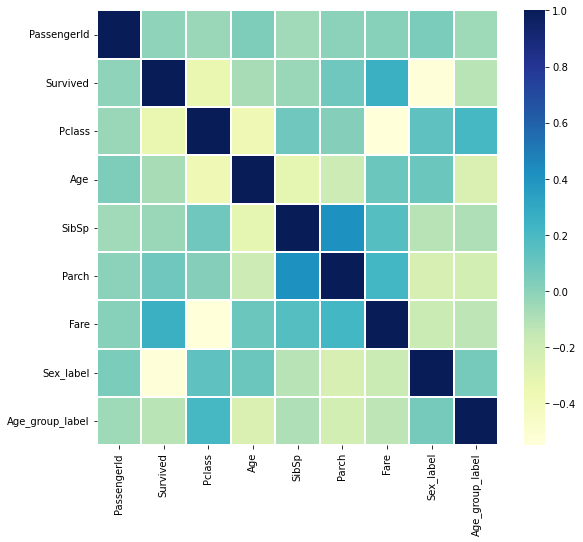

In [8]:
corrmat = df.corr(method='pearson')
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [9]:
df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_label,Age_group_label
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.052248
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,-0.125493
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.209505
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.257779
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.095181
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.217979
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.133538
Sex_label,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,0.056279
Age_group_label,-0.052248,-0.125493,0.209505,-0.257779,-0.095181,-0.217979,-0.133538,0.056279,1.000000


In [10]:
df.corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_label,Age_group_label
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975,0.042939,-0.046048
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736,-0.543351,-0.129659
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032,0.135775,0.209536
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051,0.083330,-0.259273
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113,-0.195204,-0.174805
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074,-0.254512,-0.261705
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000,-0.259593,-0.280754
Sex_label,0.042939,-0.543351,0.135775,0.083330,-0.195204,-0.254512,-0.259593,1.000000,0.068475
Age_group_label,-0.046048,-0.129659,0.209536,-0.259273,-0.174805,-0.261705,-0.280754,0.068475,1.000000


<AxesSubplot:>

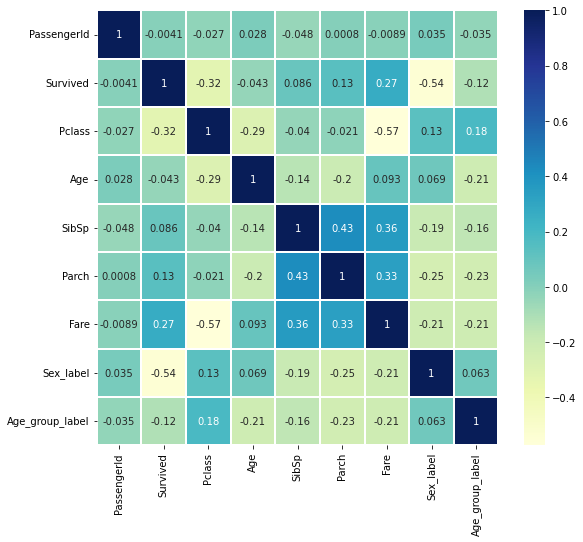

In [11]:
# Seaborn library's heatmap function lets you to plot the correlation showing calculated coefficients. 
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(df.corr(method='kendall'), ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)

# Exercise

1. Load the "iris" dataset (url = 'https://raw.githubusercontent.com/ZIFODS/Training/master/data/data_iris.csv').
2. How many numerical and categorical variables are in the dataset?
3. What is the most obvious target variable?
4. How many missing values are in each column?
5. Visualize all the columns' relationships using pair plots.
6. Which target class has a large difference in its characteristics compared to the other classes?